In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#data preprocessing
import pandas as pd
#math operations
import numpy as np
from matplotlib import rcParams, pyplot as plt, style as style
#data scaling
from sklearn.preprocessing import StandardScaler
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
#support vector machine model
from sklearn.svm import NuSVR, SVR
#kernel ridge model
from sklearn.kernel_ridge import KernelRidge
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose 


from datetime import timezone
from datetime import datetime


        
#Reading Data        
a= pd.read_csv("126.csv")        
b= pd.read_csv("126_1.csv") 
c= pd.read_csv("127.csv") 
d= pd.read_csv("128.csv") 
e= pd.read_csv("130.csv") 
f= pd.read_csv("131.csv") 
g= pd.read_csv("206.csv") 
h= pd.read_csv("207.csv") 
# Any results you write to the current directory are saved as output.

In [2]:
b.head()

,Unnamed: 0,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,3,Taiwan,Taiwan,1/21/2020,1.0,0.0,0.0,0.0
4,4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [3]:
a.head()

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,NaN,NaN
1,Yunnan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
2,Beijing,Mainland China,1/21/2020,10.0,NaN,NaN,NaN
3,Taiwan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
4,Jilin,Mainland China,1/21/2020,NaN,1.0,NaN,NaN


In [4]:
a.rename(columns={"Deaths":"Death"},inplace=True)
a.rename(columns={"Country":"Country/Region"},inplace=True)
a.rename(columns={"Date last updated":"Last Update"},inplace=True)

In [5]:
b.rename(columns={"Deaths":"Death"},inplace=True)
b.rename(columns={"Country":"Country/Region"},inplace=True)
b.rename(columns={"Date last updated":"Last Update"},inplace=True)

In [6]:
c.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/27/2020 20:30,2714.0,NaN,47.0,100.0
1,Zhejiang,Mainland China,1/27/2020 20:30,173.0,NaN,1.0,NaN
2,Henan,Mainland China,1/27/2020 20:30,168.0,NaN,NaN,1.0
3,Guangdong,Mainland China,1/27/2020 20:30,151.0,NaN,4.0,NaN
4,Chongqing,Mainland China,1/27/2020 20:30,132.0,NaN,NaN,NaN


In [7]:
d.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/28/2020 18:00,3554.0,NaN,80.0,125.0
1,Guangdong,Mainland China,1/28/2020 18:00,207.0,NaN,4.0,NaN
2,Zhejiang,Mainland China,1/28/2020 18:00,173.0,NaN,3.0,NaN
3,Henan,Mainland China,1/28/2020 18:00,168.0,NaN,NaN,1.0
4,Hunan,Mainland China,1/28/2020 18:00,143.0,NaN,NaN,NaN


In [8]:
e.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/30/2020 21:30,5806.0,NaN,116.0,204.0
1,Zhejiang,Mainland China,1/30/2020 21:30,537.0,NaN,9.0,NaN
2,Guangdong,Mainland China,1/30/2020 21:30,393.0,NaN,11.0,NaN
3,Henan,Mainland China,1/30/2020 21:30,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/30/2020 21:30,332.0,NaN,2.0,NaN


In [9]:
f.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN


In [10]:
g.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2/5/20 16:43,16678.0,NaN,538.0,479.0
1,Guangdong,Mainland China,2/5/20 13:23,895.0,NaN,49.0,0.0
2,Zhejiang,Mainland China,2/5/20 15:13,895.0,NaN,78.0,0.0
3,Henan,Mainland China,2/5/20 15:03,764.0,NaN,47.0,2.0
4,Hunan,Mainland China,2/5/20 15:23,661.0,NaN,54.0,0.0


In [11]:
h.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2/5/20 16:43,16678.0,NaN,538.0,479.0
1,Guangdong,Mainland China,2/5/20 13:23,895.0,NaN,49.0,0.0
2,Zhejiang,Mainland China,2/5/20 15:13,895.0,NaN,78.0,0.0
3,Henan,Mainland China,2/5/20 15:03,764.0,NaN,47.0,2.0
4,Hunan,Mainland China,2/5/20 15:23,661.0,NaN,54.0,0.0


In [12]:
a.fillna(0,inplace=True)

In [13]:
a.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,Taiwan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [14]:
b.fillna(0,inplace=True)

In [15]:
c.fillna(0,inplace=True)

In [16]:
d.fillna(0,inplace=True)

In [17]:
e.fillna(0,inplace=True)

In [18]:
f.fillna(0,inplace=True)

In [19]:
g.fillna(0,inplace=True)

In [20]:
h.fillna(0,inplace=True)

In [21]:
b.drop(['Unnamed: 0'],axis=1,inplace=True)
b.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,Taiwan,Taiwan,1/21/2020,1.0,0.0,0.0,0.0
4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [22]:
pdList=[a,b,c,d,e,f,g,h]

In [23]:
new_df = pd.concat(pdList)

In [24]:
new_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,Taiwan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [25]:
new_df.isna().sum()

Province/State    0
Country/Region    0
Last Update       0
Confirmed         0
Suspected         0
Recovered         0
Death             0
dtype: int64

In [26]:
b.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,Taiwan,Taiwan,1/21/2020,1.0,0.0,0.0,0.0
4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [27]:
c.shape

(566, 7)

In [28]:
d.shape

(669, 7)

In [29]:
e.shape

(1000, 7)

In [30]:
f.shape

(1125, 7)

In [31]:
g.shape

(1940, 7)

In [32]:
h.shape

(1877, 7)

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 1876
Data columns (total 7 columns):
Province/State    7913 non-null object
Country/Region    7913 non-null object
Last Update       7913 non-null object
Confirmed         7913 non-null float64
Suspected         7913 non-null float64
Recovered         7913 non-null float64
Death             7913 non-null float64
dtypes: float64(4), object(3)
memory usage: 494.6+ KB


In [34]:
new_df.corr()

,Confirmed,Suspected,Recovered,Death
Confirmed,1.000000,-0.016757,0.982052,0.985868
Suspected,-0.016757,1.000000,-0.016702,-0.012787
Recovered,0.982052,-0.016702,1.000000,0.958139
Death,0.985868,-0.012787,0.958139,1.000000


In [35]:
new_df['Last Update'].isna().sum()

0

In [36]:
new_df['Last Update'].fillna(0,inplace=True)

In [37]:
new_df.groupby(['Last Update']).size()

Last Update
1/21/2020             216
1/22/2020 12:00       304
1/23/20 12:00 PM      368
1/24/2020 12:00 AM    304
1/24/2020 12:00 PM    320
                     ... 
2/5/20 6:23             2
2/5/20 7:43             2
2/5/20 8:43             2
2/5/20 8:53             2
2/5/20 9:13             2
Length: 278, dtype: int64

In [38]:
import datetime



In [39]:
new_df['Last Update'] = pd.to_datetime(new_df['Last Update'])

In [40]:
new_df.corr()

,Confirmed,Suspected,Recovered,Death
Confirmed,1.000000,-0.016757,0.982052,0.985868
Suspected,-0.016757,1.000000,-0.016702,-0.012787
Recovered,0.982052,-0.016702,1.000000,0.958139
Death,0.985868,-0.012787,0.958139,1.000000


For NaT Values

In [41]:
new_df.replace({pd.NaT: None},inplace=True)

In [42]:
new_df

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Shanghai,Mainland China,2020-01-21,9.0,10.0,0.0,0.0
1,Yunnan,Mainland China,2020-01-21,1.0,0.0,0.0,0.0
2,Beijing,Mainland China,2020-01-21,10.0,0.0,0.0,0.0
3,Taiwan,Mainland China,2020-01-21,1.0,0.0,0.0,0.0
4,Jilin,Mainland China,2020-01-21,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1872,Heilongjiang,Mainland China,2020-01-21,0.0,1.0,0.0,0.0
1873,0,Japan,2020-01-21,1.0,0.0,0.0,0.0
1874,0,Thailand,2020-01-21,2.0,0.0,0.0,0.0
1875,0,South Korea,2020-01-21,1.0,0.0,0.0,0.0


In [43]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 1876
Data columns (total 7 columns):
Province/State    7913 non-null object
Country/Region    7913 non-null object
Last Update       7913 non-null datetime64[ns]
Confirmed         7913 non-null float64
Suspected         7913 non-null float64
Recovered         7913 non-null float64
Death             7913 non-null float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 494.6+ KB


In [44]:
new_df['Last Update'] = pd.to_datetime(new_df['Last Update'])

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 1876
Data columns (total 7 columns):
Province/State    7913 non-null object
Country/Region    7913 non-null object
Last Update       7913 non-null datetime64[ns]
Confirmed         7913 non-null float64
Suspected         7913 non-null float64
Recovered         7913 non-null float64
Death             7913 non-null float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 494.6+ KB


In [46]:
new_df.replace({pd.NaT: None},inplace=True)

In [47]:
#Splitting date and time

In [48]:
new_df['Time'],new_df['Last Update']= new_df['Last Update'].apply(lambda x:x.time()), new_df['Last Update'].apply(lambda x:x.date())
new_df

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death,Time
0,Shanghai,Mainland China,2020-01-21,9.0,10.0,0.0,0.0,00:00:00
1,Yunnan,Mainland China,2020-01-21,1.0,0.0,0.0,0.0,00:00:00
2,Beijing,Mainland China,2020-01-21,10.0,0.0,0.0,0.0,00:00:00
3,Taiwan,Mainland China,2020-01-21,1.0,0.0,0.0,0.0,00:00:00
4,Jilin,Mainland China,2020-01-21,0.0,1.0,0.0,0.0,00:00:00
...,...,...,...,...,...,...,...,...
1872,Heilongjiang,Mainland China,2020-01-21,0.0,1.0,0.0,0.0,00:00:00
1873,0,Japan,2020-01-21,1.0,0.0,0.0,0.0,00:00:00
1874,0,Thailand,2020-01-21,2.0,0.0,0.0,0.0,00:00:00
1875,0,South Korea,2020-01-21,1.0,0.0,0.0,0.0,00:00:00


In [38]:
country_province =new_df.fillna('N/A').groupby(['Country/Region','Province/State'])['Confirmed', 'Death'].max().sort_values(by='Confirmed', ascending=False)
country_province

Confirmed  Death
Country/Region Province/State                  
Mainland China Hubei             16678.0  479.0
               Zhejiang            895.0    0.0
               Guangdong           895.0    0.0
               Henan               764.0    2.0
               Hunan               661.0    0.0
...                                  ...    ...
Mexico         0                     0.0    0.0
China          Tibet                 0.0    0.0
Colombia       0                     0.0    0.0
               0                     0.0    0.0
Brazil         0                     0.0    0.0

[103 rows x 2 columns]

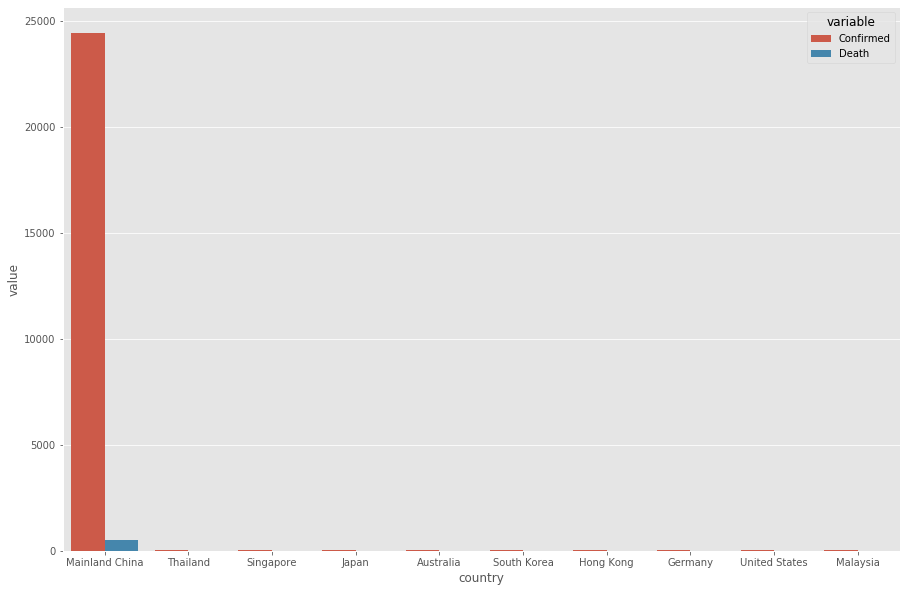

In [42]:
#Aggregate records by countries
countries = country_province.groupby('Country/Region')['Confirmed','Death'].sum().sort_values(by= 'Confirmed',ascending=False)

countries['country'] = countries.index

# Unpivot the dataframe from wide to long format
df_long = pd.melt(countries, id_vars=['country'] , value_vars=['Confirmed','Death'])

#Top countries by confirmed cases
top_countries = countries.index[:10]

df_top_countries = df_long[df_long['country'].isin(top_countries)]

style.use('ggplot')
rcParams['figure.figsize'] = 15,10
ax = sns.barplot(x = 'country', hue="variable", y="value", data=df_top_countries)

Time series analysis 

In [44]:
new_df['Last Update'].min(), new_df['Last Update'].max()

('1/21/2020', '2/5/20 9:13')

In [46]:
# Remove columns we do not need
cols = ['Suspected', 'Recovered', 'Death']
times_series_cntr = new_df.drop(cols, axis=1).fillna('N/A')

# Aggregate cases by date and country
times_series_cntr = times_series_cntr.groupby(['Last Update','Province/State','Country/Region'])['Confirmed'].max()\
                    .groupby(['Last Update','Country/Region']).sum()\
                    .reset_index()

# Indexing with Time Series Data
times_series_cntr = times_series_cntr.set_index('Last Update')

In [47]:
times_series_df = times_series_cntr.groupby('Last Update')['Confirmed'].sum().reset_index()
times_series_df = times_series_df.set_index('Last Update')

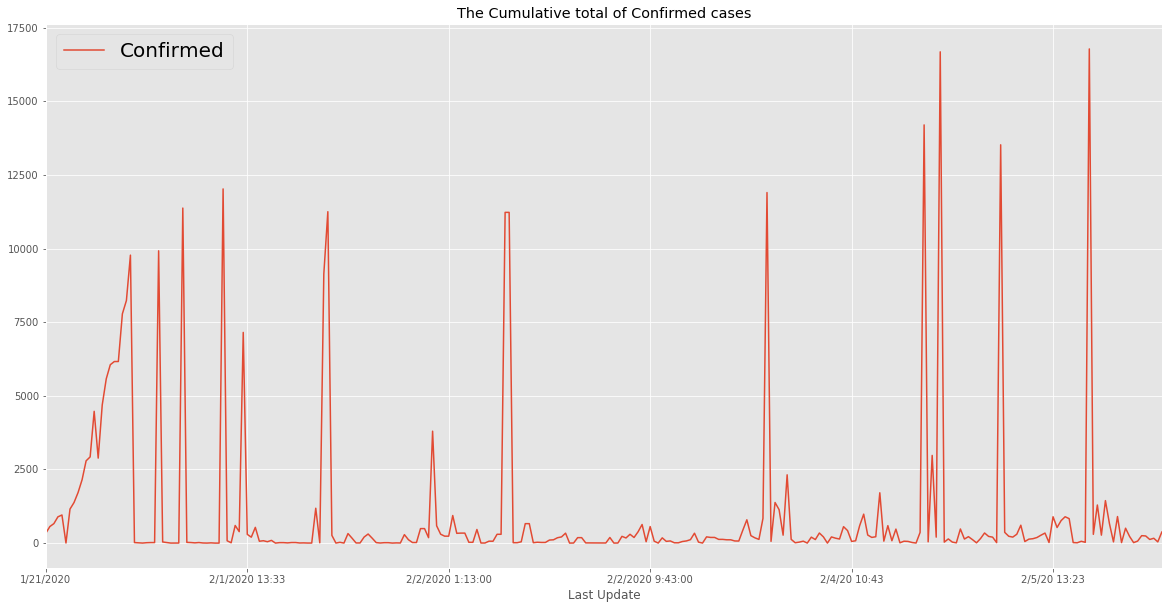

In [48]:
# Cumulative total of Confirmed cases

times_series_df.plot(figsize=(20, 10), title="The Cumulative total of Confirmed cases")
plt.legend(loc=2, prop={'size': 20})
plt.show()

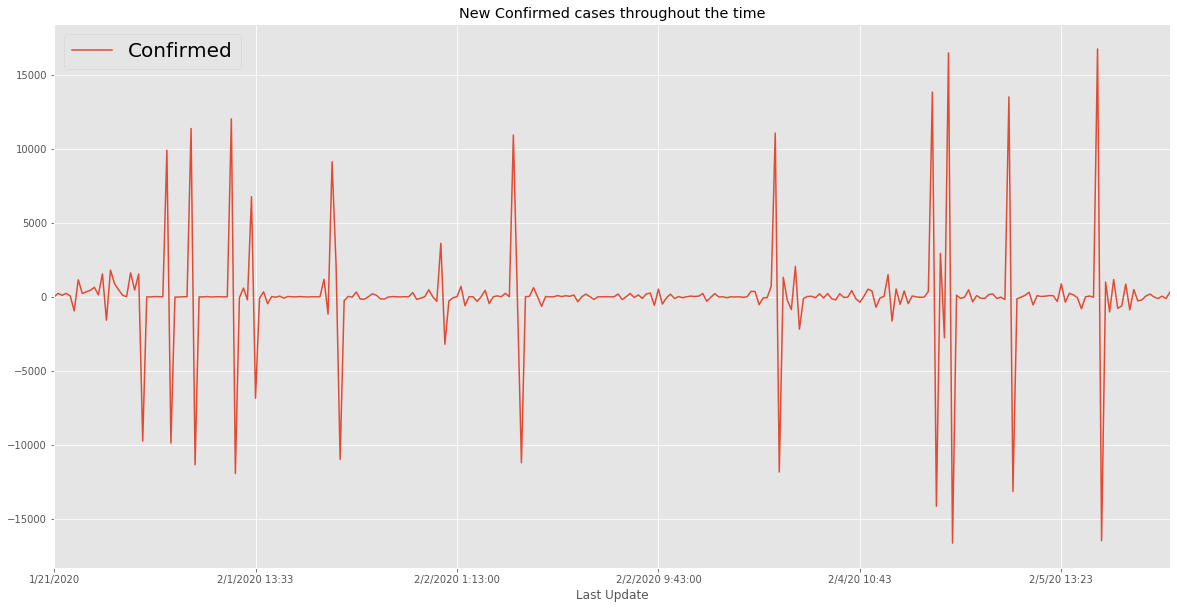

In [49]:
# New Confirmed cases throughout the time

times_series_df.diff().fillna(0).plot(figsize=(20, 10), title="New Confirmed cases throughout the time")
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [49]:
#To rotate ticklabels 

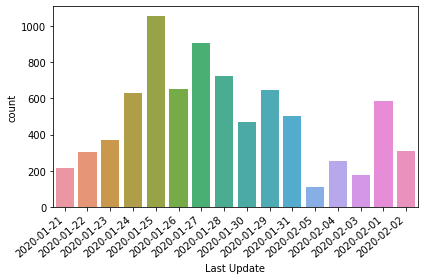

In [50]:
ax = sns.countplot(x="Last Update", data=new_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


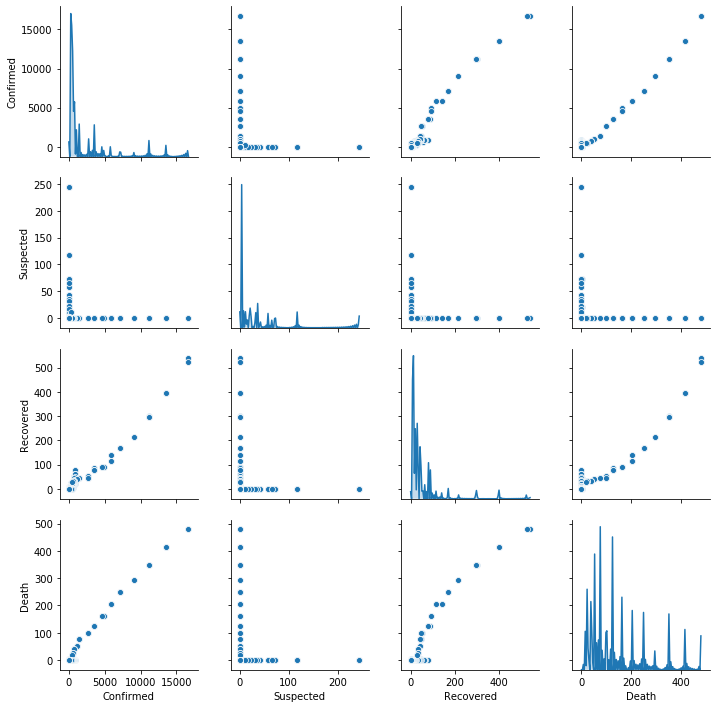

In [51]:
sns.pairplot(new_df,diag_kind="kde")

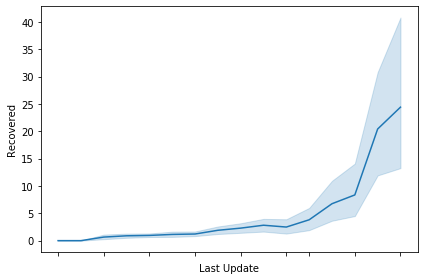

In [57]:
bx = sns.lineplot(x="Last Update",y="Recovered", data=new_df)
#plt.size(20,40)
plt.xlabel("Last Update") 
bx.axes.get_xaxis().set_visible(True) 
bx.tick_params(axis ='x', rotation = 45) 
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


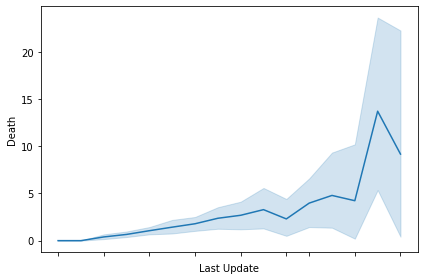

In [58]:
bx = sns.lineplot(x="Last Update",y="Death", data=new_df)
#plt.size(20,40)
plt.xlabel("Last Update") 
bx.axes.get_xaxis().set_visible(True) 
bx.tick_params(axis ='x', rotation = 45) 
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


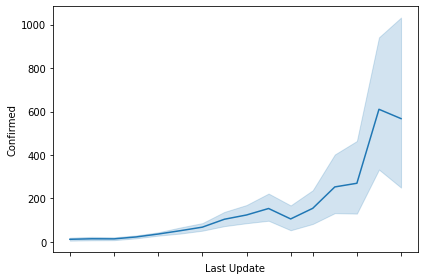

In [59]:
bx = sns.lineplot(x="Last Update",y="Confirmed", data=new_df)
#plt.size(20,40)
plt.xlabel("Last Update") 
bx.axes.get_xaxis().set_visible(True) 
bx.tick_params(axis ='x', rotation = 45) 
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


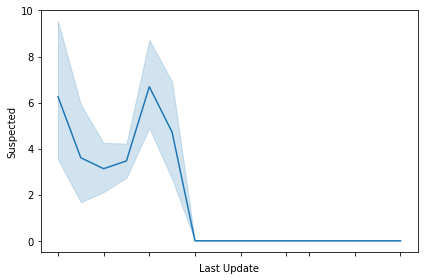

In [60]:
bx = sns.lineplot(x="Last Update",y="Suspected", data=new_df)
#plt.size(20,40)
plt.xlabel("Last Update") 
bx.axes.get_xaxis().set_visible(True) 
bx.tick_params(axis ='x', rotation = 45) 
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


As we can see recovered number has increases ,also a drop in deaths can be seen

Country wise study

In [67]:
new_df.groupby('Country/Region').size()

Country/Region
Australia                267
Belgium                    6
Brazil                     8
Cambodia                  81
Canada                   159
China                      1
Colombia                   8
Finland                   45
France                   127
Germany                   69
Hong Kong                157
India                     37
Italy                     33
Ivory Coast               12
Japan                    159
Macau                    150
Mainland China          4751
Malaysia                 127
Mexico                     8
Nepal                    119
Philippines               45
Russia                    29
Singapore                143
South Korea              159
Spain                     26
Sri Lanka                 75
Sweden                    29
Taiwan                   157
Thailand                 159
UK                        29
US                        14
United Arab Emirates      49
United States            532
Vietnam                  143